<a href="https://colab.research.google.com/github/rdt2099/Titanic_Dataset/blob/main/Titanic_EDA_ML_Hyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:

train = pd.read_csv('/content/drive/MyDrive/TitanicDataSet/train.csv')
test = pd.read_csv('/content/drive/MyDrive/TitanicDataSet/test.csv')
print("Train Data")
print(train.shape)
print(train.columns)

print("Test Data")
print(test.shape)
print(test.columns)

Train Data
(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Test Data
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#Data Exploration
print("First Few Records of DataSet")
train.head()

First Few Records of DataSet


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Data Exploration
print("Features of Dataset")
train.info()


Features of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


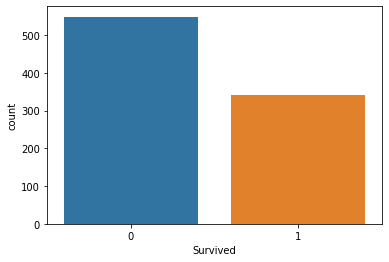

In [ ]:
#Count of Survived People
train['Survived'].value_counts() 

sns.countplot(train['Survived'],label="Count")

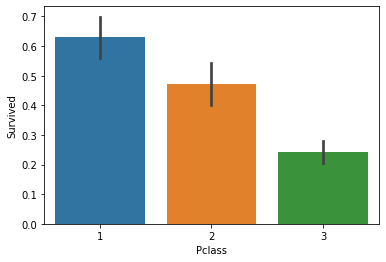

In [ ]:

sns.barplot(x='Pclass', y='Survived', data=train)


In [ ]:
train.pivot_table('Survived', ['Sex', 'Age'], 'Pclass')

Pclass          1    2     3
Sex    Age                  
female 0.75   NaN  NaN  1.00
       1.00   NaN  NaN  1.00
       2.00   0.0  1.0  0.25
       3.00   NaN  1.0  0.00
       4.00   NaN  1.0  1.00
...           ...  ...   ...
male   70.00  0.0  0.0   NaN
       70.50  NaN  NaN  0.00
       71.00  0.0  NaN   NaN
       74.00  NaN  NaN  0.00
       80.00  1.0  NaN   NaN

[145 rows x 3 columns]

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f36a12e20d0>,
      dtype=object)

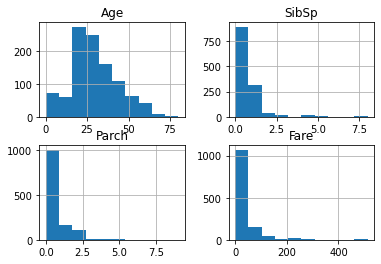

In [ ]:
df_num = all_data[['Age','SibSp','Parch','Fare']]

df_num.hist() 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


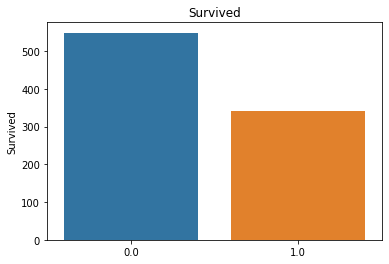

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


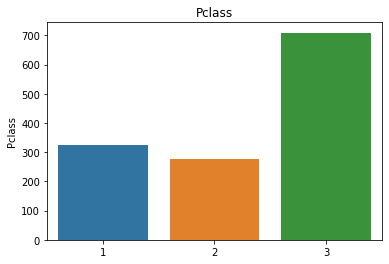

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


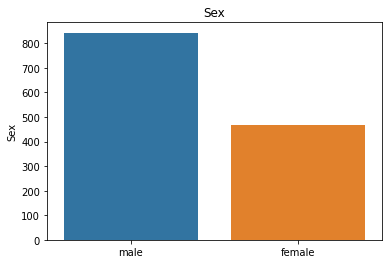

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


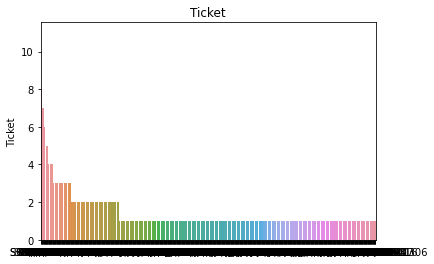

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


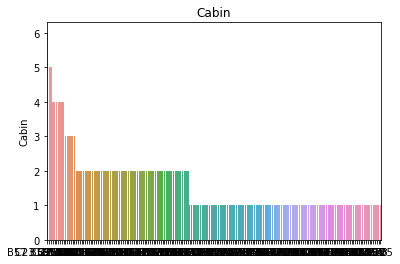

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


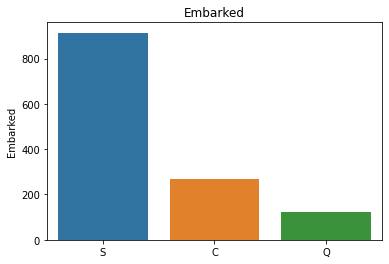

In [ ]:
df_cat = all_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

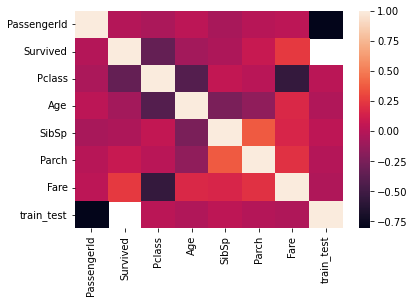

In [ ]:
sns.heatmap(all_data.corr())

In [ ]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


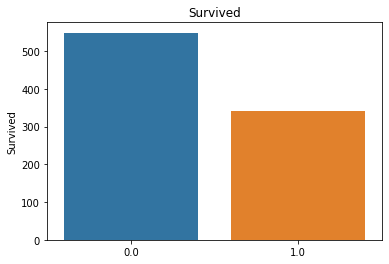

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


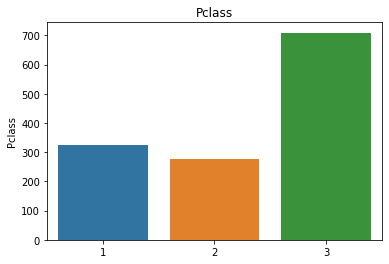

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


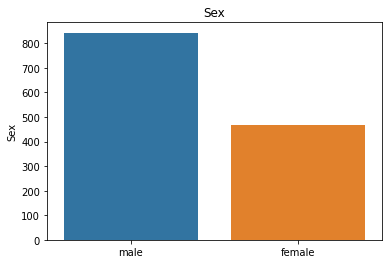

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


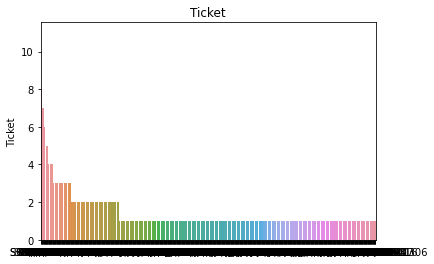

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


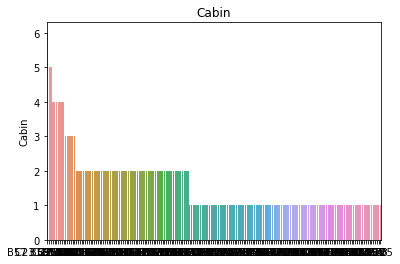

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


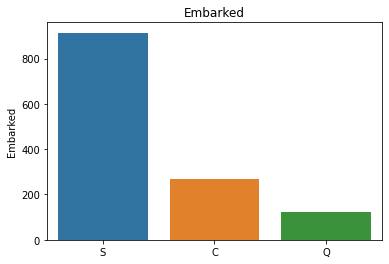

In [ ]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [ ]:
#Feature Eng...
all_data = pd.concat([train,test])

print(all_data.head())

all_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
all_data = all_data.drop(columns='Cabin', axis=1)

all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)


all_data['Fare'].fillna(0, inplace=True)
all_data['Survived'].fillna(0, inplace=True)
#print(all_data['Embarked'].mode())

all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

X = all_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = all_data['Survived']
print(X)
print(Y)

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           1  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S          

In [ ]:
all_data = pd.concat([train,test])
all_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
all_data = all_data.drop(columns='Cabin', axis=1)

all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)


all_data['Fare'].fillna(0, inplace=True)
all_data['Survived'].fillna(0, inplace=True)
#print(all_data['Embarked'].mode())

all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

all_data.isnull().sum()
# print(X_train)
# print(Y_train)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
train_test     0
dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



lr = LogisticRegression(max_iter = 2000)
cv_lr = cross_val_score(lr,X_train,Y_train,cv=5)


print(cv_lr)
print(cv_lr.mean())

lr.fit(X_train, Y_train)
X_train_prediction = lr.predict(X_train)



#acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
training_data_accuracy_lr = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_lr)


X_test_prediction = lr.predict(X_test)


test_data_accuracy_lr = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy_lr)

print("Classification Report for Train")
print(classification_report(Y_train, X_train_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_train, X_train_prediction)}\n")




print("Classification Report for Test")
print(classification_report(Y_test, X_test_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_test, X_test_prediction)}\n")




[0.89047619 0.85238095 0.84688995 0.88038278 0.84688995]
0.8634039644565961
Accuracy score of training data :  0.8710601719197708
Accuracy score of test data :  0.8625954198473282
Classification Report for Train
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91       772
         1.0       0.78      0.71      0.74       275

    accuracy                           0.87      1047
   macro avg       0.84      0.82      0.83      1047
weighted avg       0.87      0.87      0.87      1047

Confusion Matrix: 
 [[718  54]
 [ 81 194]]

Classification Report for Test
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       195
         1.0       0.76      0.67      0.71        67

    accuracy                           0.86       262
   macro avg       0.83      0.80      0.81       262
weighted avg       0.86      0.86      0.86       262

Confusion Matrix: 
 [[181  14]
 [ 22  45]]



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn,X_train,Y_train,cv=5)
print(cv_knn)
print(cv_knn.mean())


knn.fit(X_train, Y_train)
X_train_prediction = knn.predict(X_train)

training_data_accuracy_knn = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_knn)


X_test_prediction = knn.predict(X_test)
test_data_accuracy_knn = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy_knn)

print("Classification Report for train")
print(classification_report(Y_train, X_train_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_train, X_train_prediction)}\n")




print("Classification Report for test")
print(classification_report(Y_test, X_test_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_test, X_test_prediction)}\n")




[0.74285714 0.75714286 0.79425837 0.73205742 0.67464115]
0.7401913875598086
Accuracy score of training data :  0.8204393505253104
Accuracy score of test data :  0.7213740458015268
Classification Report for train
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       772
         1.0       0.71      0.53      0.61       275

    accuracy                           0.82      1047
   macro avg       0.78      0.73      0.75      1047
weighted avg       0.81      0.82      0.81      1047

Confusion Matrix: 
 [[714  58]
 [130 145]]

Classification Report for test
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       195
         1.0       0.44      0.31      0.37        67

    accuracy                           0.72       262
   macro avg       0.61      0.59      0.59       262
weighted avg       0.70      0.72      0.70       262

Confusion Matrix: 
 [[168  27]
 [ 46  21]]



In [ ]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv_svc = cross_val_score(svc,X_train,Y_train,cv=5)
print(cv_svc)
print(cv_svc.mean())



svc.fit(X_train, Y_train)
X_train_prediction = svc.predict(X_train)

training_data_accuracy_svc = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_svc)


X_test_prediction = svc.predict(X_test)
test_data_accuracy_svc = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy_svc)

print("Classification Report for Train ")
print(classification_report(Y_train, X_train_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_train, X_train_prediction)}\n")



print("Classification Report for Test ")
print(classification_report(Y_test, X_test_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_test, X_test_prediction)}\n")

[0.74761905 0.72380952 0.75598086 0.75598086 0.74641148]
0.7459603554340397
Accuracy score of training data :  0.7507163323782235
Accuracy score of test data :  0.7480916030534351
Classification Report for Train 
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85       772
         1.0       0.62      0.13      0.21       275

    accuracy                           0.75      1047
   macro avg       0.69      0.55      0.53      1047
weighted avg       0.72      0.75      0.68      1047

Confusion Matrix: 
 [[751  21]
 [240  35]]

Classification Report for Test 
              precision    recall  f1-score   support

         0.0       0.75      0.98      0.85       195
         1.0       0.56      0.07      0.13        67

    accuracy                           0.75       262
   macro avg       0.66      0.53      0.49       262
weighted avg       0.70      0.75      0.67       262

Confusion Matrix: 
 [[191   4]
 [ 62   5]]



In [ ]:

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression'],
    'TrainScore': [training_data_accuracy_svc, training_data_accuracy_knn, training_data_accuracy_lr],
    'TestScore': [test_data_accuracy_svc, test_data_accuracy_knn, test_data_accuracy_lr]
    })
result_df = results.sort_values(by='Model', ascending=False)
result_df = result_df.set_index('Model')
result_df.head()


,TrainScore,TestScore
Model,,
Support Vector Machines,0.750716,0.748092
Logistic Regression,0.871060,0.862595
KNN,0.820439,0.721374


[[0.7476190476190476, 0.7238095238095238, 0.7559808612440191, 0.7559808612440191, 0.7464114832535885], [0.7428571428571429, 0.7571428571428571, 0.7942583732057417, 0.7320574162679426, 0.6746411483253588], [0.8904761904761904, 0.8523809523809524, 0.84688995215311, 0.8803827751196173, 0.84688995215311]]


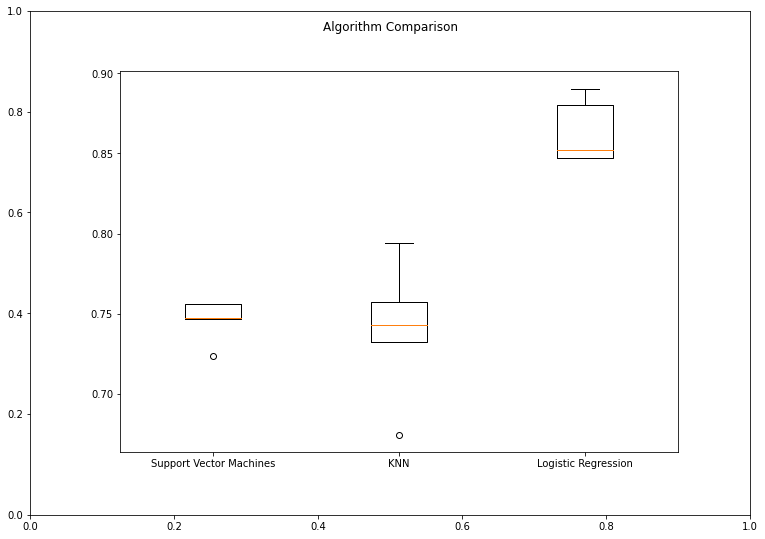

In [ ]:
names= ['Support Vector Machines', 'KNN', 'Logistic Regression']
cv_score=[cv_svc.tolist(),cv_knn.tolist(),cv_lr.tolist()]
#cv_score.append(cv_svc.tolist()) #=[cv_svc,cv_knn,cv_lr]
# fig = plt.figure()
print(cv_score)
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.boxplot(cv_score)
ax.set_xticklabels(names)
plt.show()



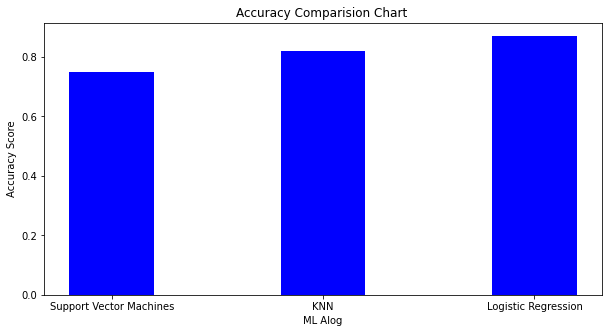

In [ ]:
names= ['Support Vector Machines', 'KNN', 'Logistic Regression']
acc_score=[training_data_accuracy_svc,training_data_accuracy_knn,training_data_accuracy_lr]




import numpy as np
import matplotlib.pyplot as plt
 
  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, acc_score, color ='blue',
        width = 0.4)
 
plt.xlabel("ML Alog")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparision Chart ")
plt.show()

In [ ]:
cross_valid_scores = {}

In [ ]:
from sklearn.model_selection import  GridSearchCV
parameters = {
    "C": [0.001, 0.01 , 0.1, 1],
    "penalty": ["l1", "l2"]
}

mlr = LogisticRegression(
    random_state=42,
    class_weight="balanced",
    solver="liblinear",
)

mlr = GridSearchCV(
    mlr, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

mlr.fit(X_train, Y_train)

print('-----')
print(f'Best parameters {mlr.best_params_}')
print(f'Mean cross-validated accuracy score of the best_estimator: ' + f'{mlr.best_score_:.3f}')
cross_valid_scores['logistic_regression'] = mlr.best_score_


X_train_prediction = mlr.predict(X_train)



#acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
training_data_accuracy_lr = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_lr)


X_test_prediction = mlr.predict(X_test)


test_data_accuracy_lr = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy_lr)

print("Classification Report For Train")
print(classification_report(Y_train, X_train_prediction))
print(f"Confusion Matrix: \n {confusion_matrix(Y_train, X_train_prediction)}\n")


print("Classification Report For Test")
print(classification_report(Y_test, X_test_prediction))
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, X_test_prediction)}\n")





-----
Best parameters {'C': 1, 'penalty': 'l1'}
Mean cross-validated accuracy score of the best_estimator: 0.833
Accuracy score of training data :  0.830945558739255
Accuracy score of test data :  0.8320610687022901
Classification Report For Train
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       772
         1.0       0.64      0.83      0.72       275

    accuracy                           0.83      1047
   macro avg       0.78      0.83      0.80      1047
weighted avg       0.85      0.83      0.84      1047

Confusion Matrix: 
 [[642 130]
 [ 47 228]]

Classification Report For Test
              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       195
         1.0       0.63      0.85      0.72        67

    accuracy                           0.83       262
   macro avg       0.78      0.84      0.80       262
weighted avg       0.86      0.83      0.84       262

Confusion Matrix: 
 [[1

In [ ]:
parameters = {
    "C": [0.001, 0.01],# 0.1, 1.],
    "kernel": ["linear", "sigmoid"], # "poly", "rbf",
    "gamma": ["scale", "auto"],
}

model_svc = SVC( random_state=42,   class_weight="balanced",    probability=True,)

model_svc = GridSearchCV(    model_svc,     parameters,     cv=5,    scoring='accuracy',)

model_svc.fit(X_train, Y_train)



print(f'Best parameters {model_svc.best_params_}')
print(    f'Mean cross-validated accuracy score of the best_estimator: ' +     f'{model_svc.best_score_:.3f}')
cross_valid_scores['svc'] = model_svc.best_score_


X_train_prediction = model_svc.predict(X_train)

training_data_accuracy_svc = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_svc)


X_test_prediction = model_svc.predict(X_test)
test_data_accuracy_svc = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy_svc)

print("Classification Report For Train")
print(classification_report(Y_train, X_train_prediction))
print(f"Confusion Matrix: \n {confusion_matrix(Y_train, X_train_prediction)}\n")


print("Classification Report For Test")
print(classification_report(Y_test, X_test_prediction))
print(f"Confusion Matrix: \n {confusion_matrix(Y_test, X_test_prediction)}\n")



Best parameters {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Mean cross-validated accuracy score of the best_estimator: 0.822
Accuracy score of training data :  0.8261700095510984
Accuracy score of test data :  0.8244274809160306
Classification Report For Train
              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       772
         1.0       0.64      0.79      0.70       275

    accuracy                           0.83      1047
   macro avg       0.78      0.81      0.79      1047
weighted avg       0.84      0.83      0.83      1047

Confusion Matrix: 
 [[648 124]
 [ 58 217]]

Classification Report For Test
              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88       195
         1.0       0.62      0.81      0.70        67

    accuracy                           0.82       262
   macro avg       0.77      0.82      0.79       262
weighted avg       0.85      0.82      0.83       262

Conf

In [ ]:
parameters = {
    "weights": ["uniform"], #, "distance"
}

model_knn = KNeighborsClassifier(
)
model_knn= GridSearchCV(
    model_knn, 
    parameters, 
    cv=5,
    scoring='accuracy',
)
model_knn.fit(X_train, Y_train)


print(f'Best parameters {model_knn.best_params_}')
print( f'Mean cross-validated accuracy score of the best_estimator: ' +   f'{model_knn.best_score_:.3f}'
)
cross_valid_scores['k_neighbors'] =model_knn.best_score_



X_train_prediction = model_knn.predict(X_train)

training_data_accuracy_knn = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_knn)


X_test_prediction = model_knn.predict(X_test)
test_data_accuracy_knn = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy_knn)

print("Classification Report For Train")
print(classification_report(Y_train, X_train_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_train, X_train_prediction)}\n")



print("Classification Report For Test")
print(classification_report(Y_test, X_test_prediction))


print(f"Confusion Matrix: \n {confusion_matrix(Y_test, X_test_prediction)}\n")


Best parameters {'weights': 'uniform'}
Mean cross-validated accuracy score of the best_estimator: 0.740
Accuracy score of training data :  0.8204393505253104
Accuracy score of test data :  0.7213740458015268
Classification Report For Train
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       772
         1.0       0.71      0.53      0.61       275

    accuracy                           0.82      1047
   macro avg       0.78      0.73      0.75      1047
weighted avg       0.81      0.82      0.81      1047

Confusion Matrix: 
 [[714  58]
 [130 145]]

Classification Report For Test
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       195
         1.0       0.44      0.31      0.37        67

    accuracy                           0.72       262
   macro avg       0.61      0.59      0.59       262
weighted avg       0.70      0.72      0.70       262

Confusion Matrix: 
 [[168  27]


In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression'],
    'TrainScore':[training_data_accuracy_svc,training_data_accuracy_knn,training_data_accuracy_lr],
    'TestScore':[test_data_accuracy_svc,test_data_accuracy_knn,test_data_accuracy_lr],
    
    })
result_df = results.sort_values(by='Model', ascending=False)
result_df = result_df.set_index('Model')
result_df.head()

,TrainScore,TestScore
Model,,
Support Vector Machines,0.826170,0.824427
Logistic Regression,0.830946,0.832061
KNN,0.820439,0.721374


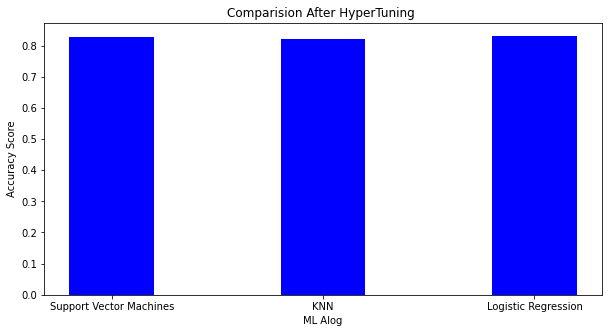

In [ ]:
names= ['Support Vector Machines', 'KNN', 'Logistic Regression']
acc_score=[training_data_accuracy_svc,training_data_accuracy_knn,training_data_accuracy_lr]




import numpy as np
import matplotlib.pyplot as plt
 
  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(names, acc_score, color ='blue',
        width = 0.4)
 
plt.xlabel("ML Alog")
plt.ylabel("Accuracy Score")
plt.title("Comparision After HyperTuning ")
plt.show()